In [57]:
import os
import gc
import numpy as np
import pandas as pd
import matplotlib as plt
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']
path = 'data/Pixiv'

In [58]:
base_data = pd.read_csv(os.path.join(path, 'pixiv_daily_rank_base.csv'))

In [59]:
tag_data = pd.read_csv(os.path.join(path, 'pixiv_daily_rank_tag.csv'))

In [60]:
gc.collect()

15108

In [61]:
x = pd.merge(base_data, tag_data[tag_data['tags'] == '東方'], on='illust_id', how='inner')

In [62]:
y = pd.merge(base_data, tag_data[tag_data['tags'] == 'Fate/GrandOrder'], on='illust_id', how='inner')

In [63]:
def get_data_per_sign(str_sign):
    temp = base_data.set_index('date')
    temp.index = pd.to_datetime(temp.index)
    return temp.resample(str_sign).size()

In [64]:
x.set_index('date', inplace=True)

In [65]:
y.set_index('date', inplace=True)

In [66]:
x.index = pd.to_datetime(x.index)

In [67]:
y.index = pd.to_datetime(y.index)

In [68]:
sum_data = get_data_per_sign('M')

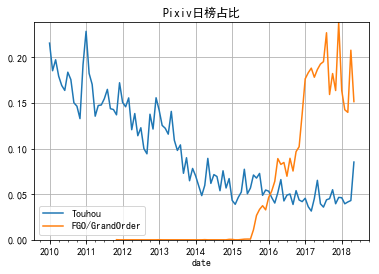

In [73]:
temp = x.resample('M').size().div(sum_data).plot(title='Pixiv日榜占比', grid=True, ylim=0, legend=True, label='Touhou')
y.resample('M').size().div(sum_data).plot(grid=True, legend=True, label='FGO/GrandOrder')

In [76]:
fig = temp.get_figure()
fig.savefig('data_img/pixiv_daily_rank_1.png')